### Motivation

It is always interesting to take decision on which fuel (2 choices) should choose, the cheaper with more consumption or the more expensive but with moderated consumption. Here in this dataset, tee consumption fuel w.r.t two fuels and related features such as speed, distance travelled, temperature inside and outside, weather conditions, AC on or off etc. are given.

This is my basic approach and first project

Details of features in dataset:
- distance is the distance in kilometers i was driving
- consume is the consumption in liters per 100 kilometers as seen in the display
- speed is the average speed.
- temp_inside is the setting of the heating or "NaN" if it was turned off
- temp_outside is the temperature outside, taken at the end of the ride.
- specials is a remark if it was raining, snowing or if the climatization was on ("AC")
- gas type is the gas type used during the last refill
- AC is one hot encoded, the special "AC". 1 for on, 0 for off.
- rain is one-hot-encoded, the special "rain" and "snow". 1 for it was raining/snowing, 0 for it was good weather.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Load the dataset
consumption_df = pd.read_csv('./car-consume/measurements.csv', decimal = ',') # convert ',' to '.' 

In [4]:
consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      376 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill_liters    13 non-null float64
refill_gas       13 non-null object
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


##### In columns 'temp_inside', 'specials', 'refill_liters', 'refill_gas' has  null values. The 'specials' column seems to similar to weather conditions column 

In [5]:
consumption_df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill_liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [6]:
consumption_df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


refill_gas       375
refill_liters    375
specials         295
temp_inside       12
sun                0
rain               0
AC                 0
gas_type           0
temp_outside       0
speed              0
consume            0
distance           0
dtype: int64


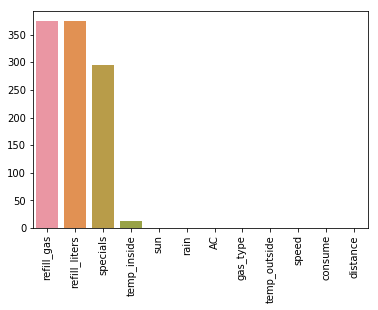

In [7]:
# look into null values

null_values = consumption_df.isnull().sum().sort_values(ascending=False)
print(null_values)

# plot
ax=sns.barplot(null_values.index,null_values.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Data visualization

In [8]:
consumption_df.drop(["specials", "refill_liters", "refill_gas"], axis=1, inplace=True)

In [9]:
consumption_df['temp_inside'].interpolate(method ='linear', limit_direction ='forward', inplace=True) 

In [10]:
consumption_df.isnull().any()

distance        False
consume         False
speed           False
temp_inside     False
temp_outside    False
gas_type        False
AC              False
rain            False
sun             False
dtype: bool

In [11]:
# fuel consume
e10_consume_value = round(consumption_df[consumption_df['gas_type'] == 'E10']['consume'].mean(),2)
sp98_consume_value = round(consumption_df[consumption_df['gas_type'] != 'E10']['consume'].mean(),2)

print('The average consumption with E10 is {} liters'.format(e10_consume_value ))
print('The average consumption with SP98 is {} liters'.format(sp98_consume_value))

The average consumption with E10 is 4.93 liters
The average consumption with SP98 is 4.9 liters


Text(23.569588694852953, 0.5, 'consume [l/100km]')

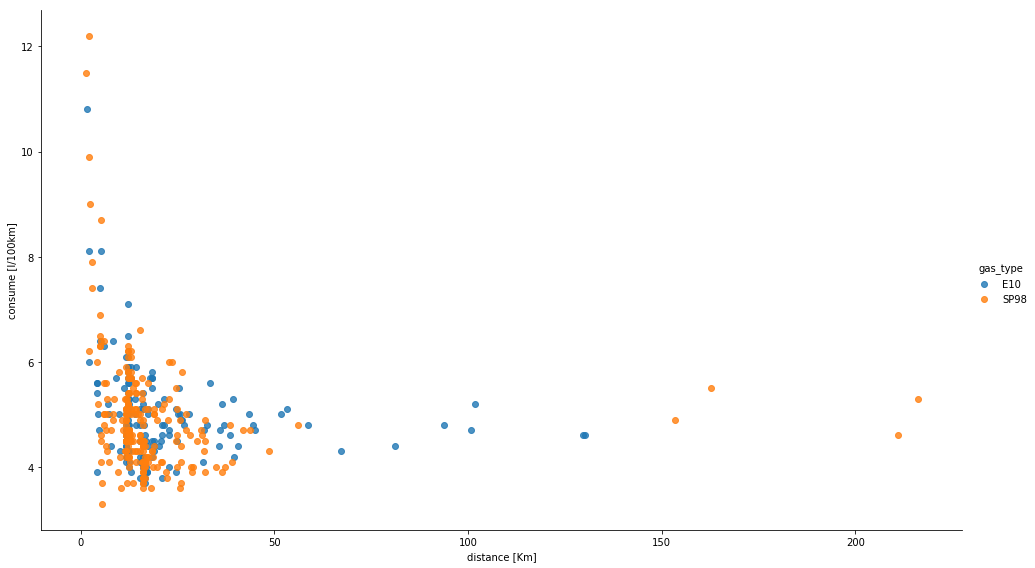

In [12]:
# distance vs consume
sns.lmplot(data = consumption_df, x = 'distance', y = 'consume', hue = 'gas_type', fit_reg=False, height=8,aspect=1.7)
plt.xlabel('distance [Km]')
plt.ylabel('consume [l/100km]')

Text(22.72790670955883, 0.5, 'consume [l/100km]')

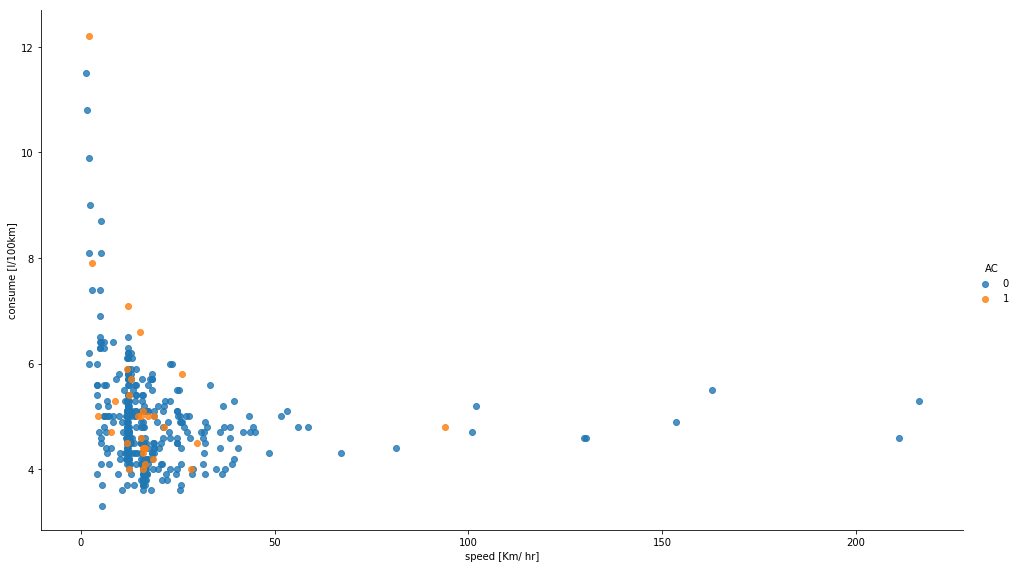

In [13]:
# speed vs consume
sns.lmplot(data = consumption_df, x = 'distance', y = 'consume', hue = 'AC', fit_reg=False, height=8,aspect=1.7)
plt.xlabel('speed [Km/ hr]')
plt.ylabel('consume [l/100km]')

In [14]:
# replace categorical fuel type into one-hot encode
df= pd.concat([consumption_df, pd.get_dummies(consumption_df['gas_type'], prefix = 'gas')], axis=1)

# now drop the original 'country' column (you don't need it anymore)
df.drop(['gas_type'],axis=1, inplace=True)

#### based on observations, the feature columns: 'temp_outside', 'rain', 'sun' are been dropped

In [15]:
X = df.drop(['consume', 'temp_outside', 'rain','sun', 'gas_SP98', 'AC'], axis =1)
y = df['consume']

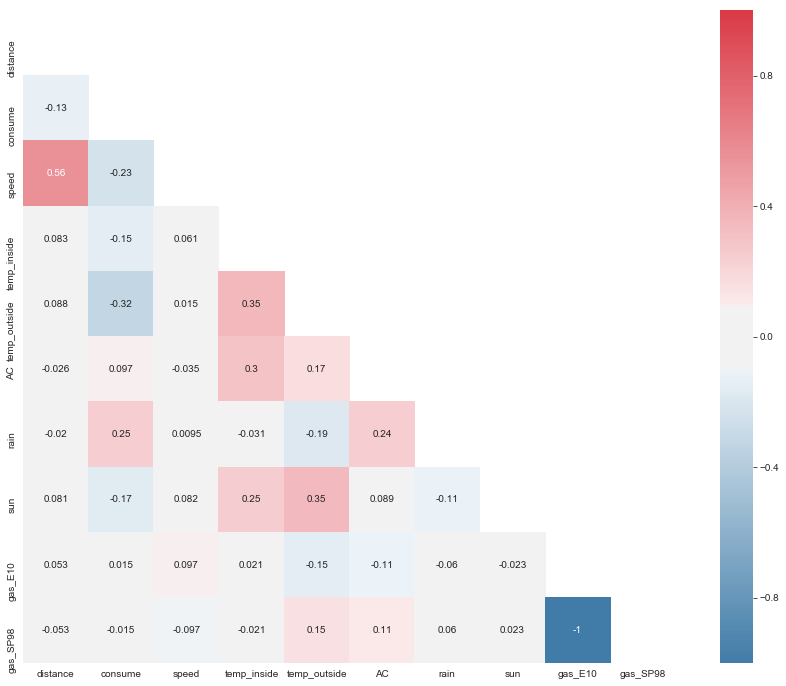

In [16]:
# covariance matrix
# Set the style of the visualization
sns.set_style('white')

# Create a convariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = None

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, sep=25, n=5, as_cmap=True)

# Draw the heatmapwith the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask, square=True, annot=True)

plt.show();

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [18]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
scale = MinMaxScaler()
s = scale.fit(x_train)
x_train= s.transform(x_train)
x_test= s.transform(x_test)

D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [21]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_pred=lr.predict(x_test)
print(y_pred)

[5.17537561 5.18181207 5.11870882 5.18734494 4.76031097 4.62563539
 4.64083686 5.18419886 4.99903356 5.07722538 4.35093221 4.92597299
 5.61073321 4.49348851 5.33354845 5.21188033 5.51122223 5.20174852
 5.65491632 5.49869376 4.30904612 4.65890308 4.93205528 5.2411943
 5.16758447 4.79257812 4.5821689  4.85864912 5.0094019  3.68228793
 5.00847047 5.35265766 5.0620093  4.73098005 4.45501282 4.83419007
 4.71912463 4.21269213 5.25081559 5.5073509  4.69527809 5.02300004
 5.37262918 3.91335995 4.69527809 4.89347047 5.29812432 5.02133247
 5.4164776  4.67268325 5.14674326 5.36226083 5.20734682 5.37585898
 4.61923887 4.84698664 5.74901204 5.25141602 4.8599456  5.31121607
 5.42804194 5.20510315 4.67177968 5.2459474  4.57370592 4.87056508
 5.40121674 4.8554012  4.82346271 4.25614614 4.45274995 4.61143077
 5.16377856 5.2147402  5.18610785 5.23342127 5.18536683 5.07097698
 5.29908242 4.90630948 5.16441775 4.4084853  4.75289092 4.49250861
 4.71868207 4.42384581 5.73290817 4.71674641 5.1883007  4.77641

In [24]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.948698383738977


In [25]:
print('MAE: ' + str(metrics.mean_absolute_error(y_pred,y_test)))
print('MSE: ' + str(metrics.mean_squared_error(y_pred,y_test)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_pred,y_test))))

MAE: 0.7115941764360242
MSE: 0.9000286233089473
RMSE: 0.948698383738977
